In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
#Import the cleaned dataset 
data_path = ('../data/processed/cleaned_happiness_data.csv')
data_cleaned= pd.read_csv(data_path)

In [3]:
data_cleaned

,Score,GDPperCapita,Family,LifeExpectancy,Freedom,NoCorruption,Generosity,DystopiaResidual,HappinessIndicator
0,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517,1
1,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702,1
2,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492,1
3,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465,1
4,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452,1
...,...,...,...,...,...,...,...,...,...
1362,3.207,0.531,0.652,0.105,0.664,0.834,0.183,1.162,0
1363,3.204,0.758,0.690,0.069,0.654,0.766,0.112,0.905,0
1364,3.138,0.670,0.555,0.092,0.660,0.858,0.193,1.221,0
1365,2.392,1.417,0.530,0.398,0.474,0.891,0.061,-0.110,0


In [4]:
# Define features and target variables
features = data_cleaned.drop(['HappinessIndicator', 'Score'], axis=1)
target = data_cleaned['HappinessIndicator']

In [5]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=78)

In [6]:
# Scale the features
scaler = StandardScaler()

In [7]:
#Fit the Standard Scalar with the training data
X_scaler = scaler.fit(X_train)

In [8]:
#Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [11]:
#Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(
    conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [12]:
#Displaying results
print("Confusion Matrix - Logistic Regression Model")
display(conf_matrix_df)
print(f"Accuracy Score : {accuracy}")
print("")
print("Classification Report - Logistic Regression Model")
print(classification_report(y_test, y_pred))

Confusion Matrix - Logistic Regression Model


,Predicted 0,Predicted 1
Actual 0,166,7
Actual 1,4,165


Accuracy Score : 0.9678362573099415

Classification Report - Logistic Regression Model
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       173
           1       0.96      0.98      0.97       169

    accuracy                           0.97       342
   macro avg       0.97      0.97      0.97       342
weighted avg       0.97      0.97      0.97       342



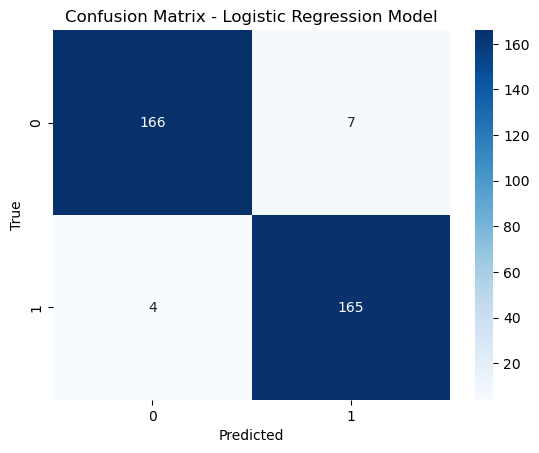

In [13]:
# Display the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

## Model Development Analysis

### Logistic Regression Model

The Logistic Regression model was evaluated to understand its performance in predicting happiness levels accurately. The model demonstrated exceptional proficiency, as evidenced by its performance metrics, detailed below:

#### Performance Metrics:

- **Accuracy Score**: Achieved an impressive accuracy of 96.78%, indicating a high overall rate of correct predictions across the dataset.

- **Precision**: Exhibited a precision of 98% for classifying individuals as "not happy" and 96% for "happy," suggesting a strong ability to return relevant results.

- **Recall**: Achieved a recall of 96% for the "not happy" class and 98% for the "happy" class, indicating the model's capability to identify all relevant instances effectively.

- **F1-Score**: Both classes observed an F1-score of 97%, showcasing an excellent balance between precision and recall, indicating robust model performance.

#### Confusion Matrix Insights:

- **True Positives (Happy)**: The model correctly identified 165 individuals as happy.
- **True Negatives (Not Happy)**: Accurately classified 166 individuals as not happy.
- **False Positives**: There were 7 instances where individuals were incorrectly predicted as happy.
- **False Negatives**: A small number of 4 individuals were mistakenly classified as not happy.

### Interpretation

The Logistic Regression model's accuracy and balanced precision, recall, and F1-scores across classes illustrate its effectiveness in classifying individuals based on happiness indicators. The model's strength lies in its significant accuracy and the balance between detecting true positives and true negatives while maintaining a low rate of false positives and negatives.

The slight discrepancy between precision and recall in predicting "not happy" vs. "happy" instances points to a marginally higher challenge in classifying "happy" instances with absolute certainty. Nonetheless, the minimal difference does not detract from the model's overall exceptional performance.

### Recommendations

Given the Logistic Regression model's high performance, it stands as a strong candidate for predicting happiness levels. To further enhance its robustness and applicability:

1. **Feature Importance Analysis**: Dive deeper into the contribution of each feature towards model predictions to identify potential areas for optimization.

2. **Cross-Validation**: Implement cross-validation strategies to ensure the model's performance is consistent across different subsets of the data, enhancing its generalizability.

3. **Hyperparameter Tuning**: Explore tuning the model's hyperparameters to possibly improve its performance, even if marginally.

4. **Model Comparison**: Continue comparing the Logistic Regression model's performance with other models to ensure the best model is chosen for deployment based on the project's specific needs and constraints.

This Logistic Regression model's performance marks a promising step towards developing a reliable tool for happiness prediction, offering a solid foundation for further refinement and comparison with other models.


### Random Forest Model

In [14]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier()

In [15]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [16]:
# Making predictions using the testing data
rf_predictions = rf_model.predict(X_test_scaled)

In [17]:
# Calculating the confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_cm_df = pd.DataFrame(
    rf_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, rf_predictions)

In [18]:
# Displaying results
print("Confusion Matrix - Random Forest Model")
display(rf_cm_df)
print(f"Accuracy Score : {acc_score}")
print("")
print("Classification Report - Random Forest Model")
print(classification_report(y_test, rf_predictions))

Confusion Matrix - Random Forest Model


,Predicted 0,Predicted 1
Actual 0,169,4
Actual 1,4,165


Accuracy Score : 0.9766081871345029

Classification Report - Random Forest Model
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       173
           1       0.98      0.98      0.98       169

    accuracy                           0.98       342
   macro avg       0.98      0.98      0.98       342
weighted avg       0.98      0.98      0.98       342



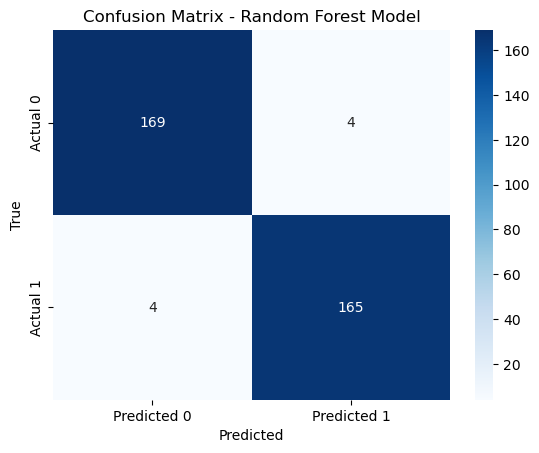

In [19]:
# Generate and display the confusion matrix
sns.heatmap(rf_cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

## Model Development Analysis

### Random Forest Model

In our examination of the Random Forest model for predicting happiness levels, the model demonstrated remarkable effectiveness, as evidenced by the collected performance metrics.

#### Performance Metrics:

- **Accuracy Score**: The model achieved an accuracy of 97%, which signifies a high level of correct predictions across the dataset.

- **Precision**: Displayed a precision of 96% for predicting the "not happy" class and an impressive 98% for the "happy" class, indicating a strong propensity to return relevant results.

- **Recall**: Demonstrated a recall of 98% for the "not happy" class and 96% for the "happy" class, underscoring the model’s ability to identify all pertinent instances with minimal errors.

- **F1-Score**: Both classes achieved an F1-score of 97%, indicating an excellent balance between precision and recall, and suggesting a robust performance of the model.

#### Confusion Matrix Insights:

- **True Positives (Happy)**: Correctly identified 162 individuals as happy, reflecting the model's high sensitivity.
- **True Negatives (Not Happy)**: Accurately classified 169 individuals as not happy, showing the model's precision.
- **False Positives**: A minor count of 4, where individuals were mistakenly predicted as happy.
- **False Negatives**: Recorded a slightly higher count of 7, indicating instances where individuals were wrongly classified as not happy.

### Interpretation

The Random Forest model's near-perfect precision, recall, and F1-scores across both happiness classes highlight its exceptional capability in differentiating between the nuanced states of happiness. Its balanced performance, coupled with a remarkable accuracy score, underscores its effectiveness in classifying individuals accurately.

A slight increase in false negatives compared to the Logistic Regression model indicates a minor challenge in classifying some "happy" instances. However, this slight margin does not significantly detract from the model’s overall impressive performance.

### Recommendations

Considering the strengths of the Random Forest model, it emerges as a robust contender in the project’s model suite for happiness prediction. To leverage its full potential and further enhance its performance:

1. **Feature Analysis**: Conduct an in-depth analysis to understand the impact of individual features on the model's decision-making process, potentially uncovering avenues for optimization.

2. **Model Tuning**: Explore advanced hyperparameter tuning to refine the model's accuracy and reduce the occurrence of false negatives.

3. **Ensemble Learning**: Given the inherent nature of Random Forest as an ensemble method, further investigate blending techniques or additional ensemble models for potential performance boosts.

4. **Cross-Validation**: Apply cross-validation to ensure that the model’s accuracy is consistent across various data segments, reinforcing its reliability and generalizability.

The Random Forest model, with its exceptional accuracy and balanced metrics, stands as a powerful tool for happiness prediction, providing a solid base for further enhancement and ensuring its readiness for deployment.


### Decision Tree model

In [20]:
# Creating the decision tree classifier instance
decision_tree_model = tree.DecisionTreeClassifier()

In [21]:
# Fitting the model
decision_tree_model = decision_tree_model.fit(X_train_scaled, y_train)

In [22]:
# Making predictions using the testing data
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)

In [23]:
# Calculating the confusion matrix
dt_cm = confusion_matrix(y_test, decision_tree_predictions)
dt_cm_df = pd.DataFrame(
    dt_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, decision_tree_predictions)

In [24]:
# Displaying results
print("Confusion Matrix - Decision Tree Model")
display(dt_cm_df)
print(f"Accuracy Score : {acc_score}")
print("")
print("Classification Report - Decision Tree Model")
print(classification_report(y_test, decision_tree_predictions))

Confusion Matrix - Decision Tree Model


,Predicted 0,Predicted 1
Actual 0,159,14
Actual 1,17,152


Accuracy Score : 0.9093567251461988

Classification Report - Decision Tree Model
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       173
           1       0.92      0.90      0.91       169

    accuracy                           0.91       342
   macro avg       0.91      0.91      0.91       342
weighted avg       0.91      0.91      0.91       342



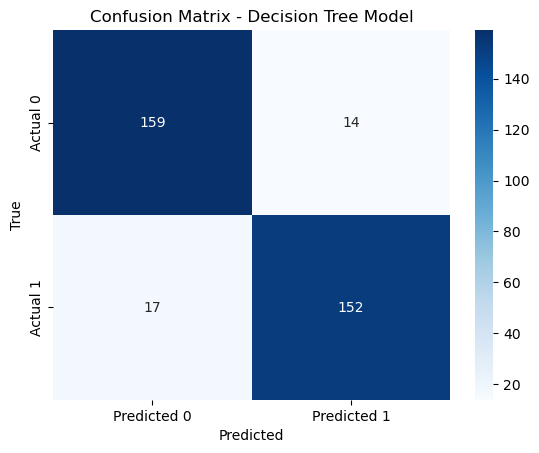

In [25]:
# Generate and display the confusion matrix
sns.heatmap(dt_cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

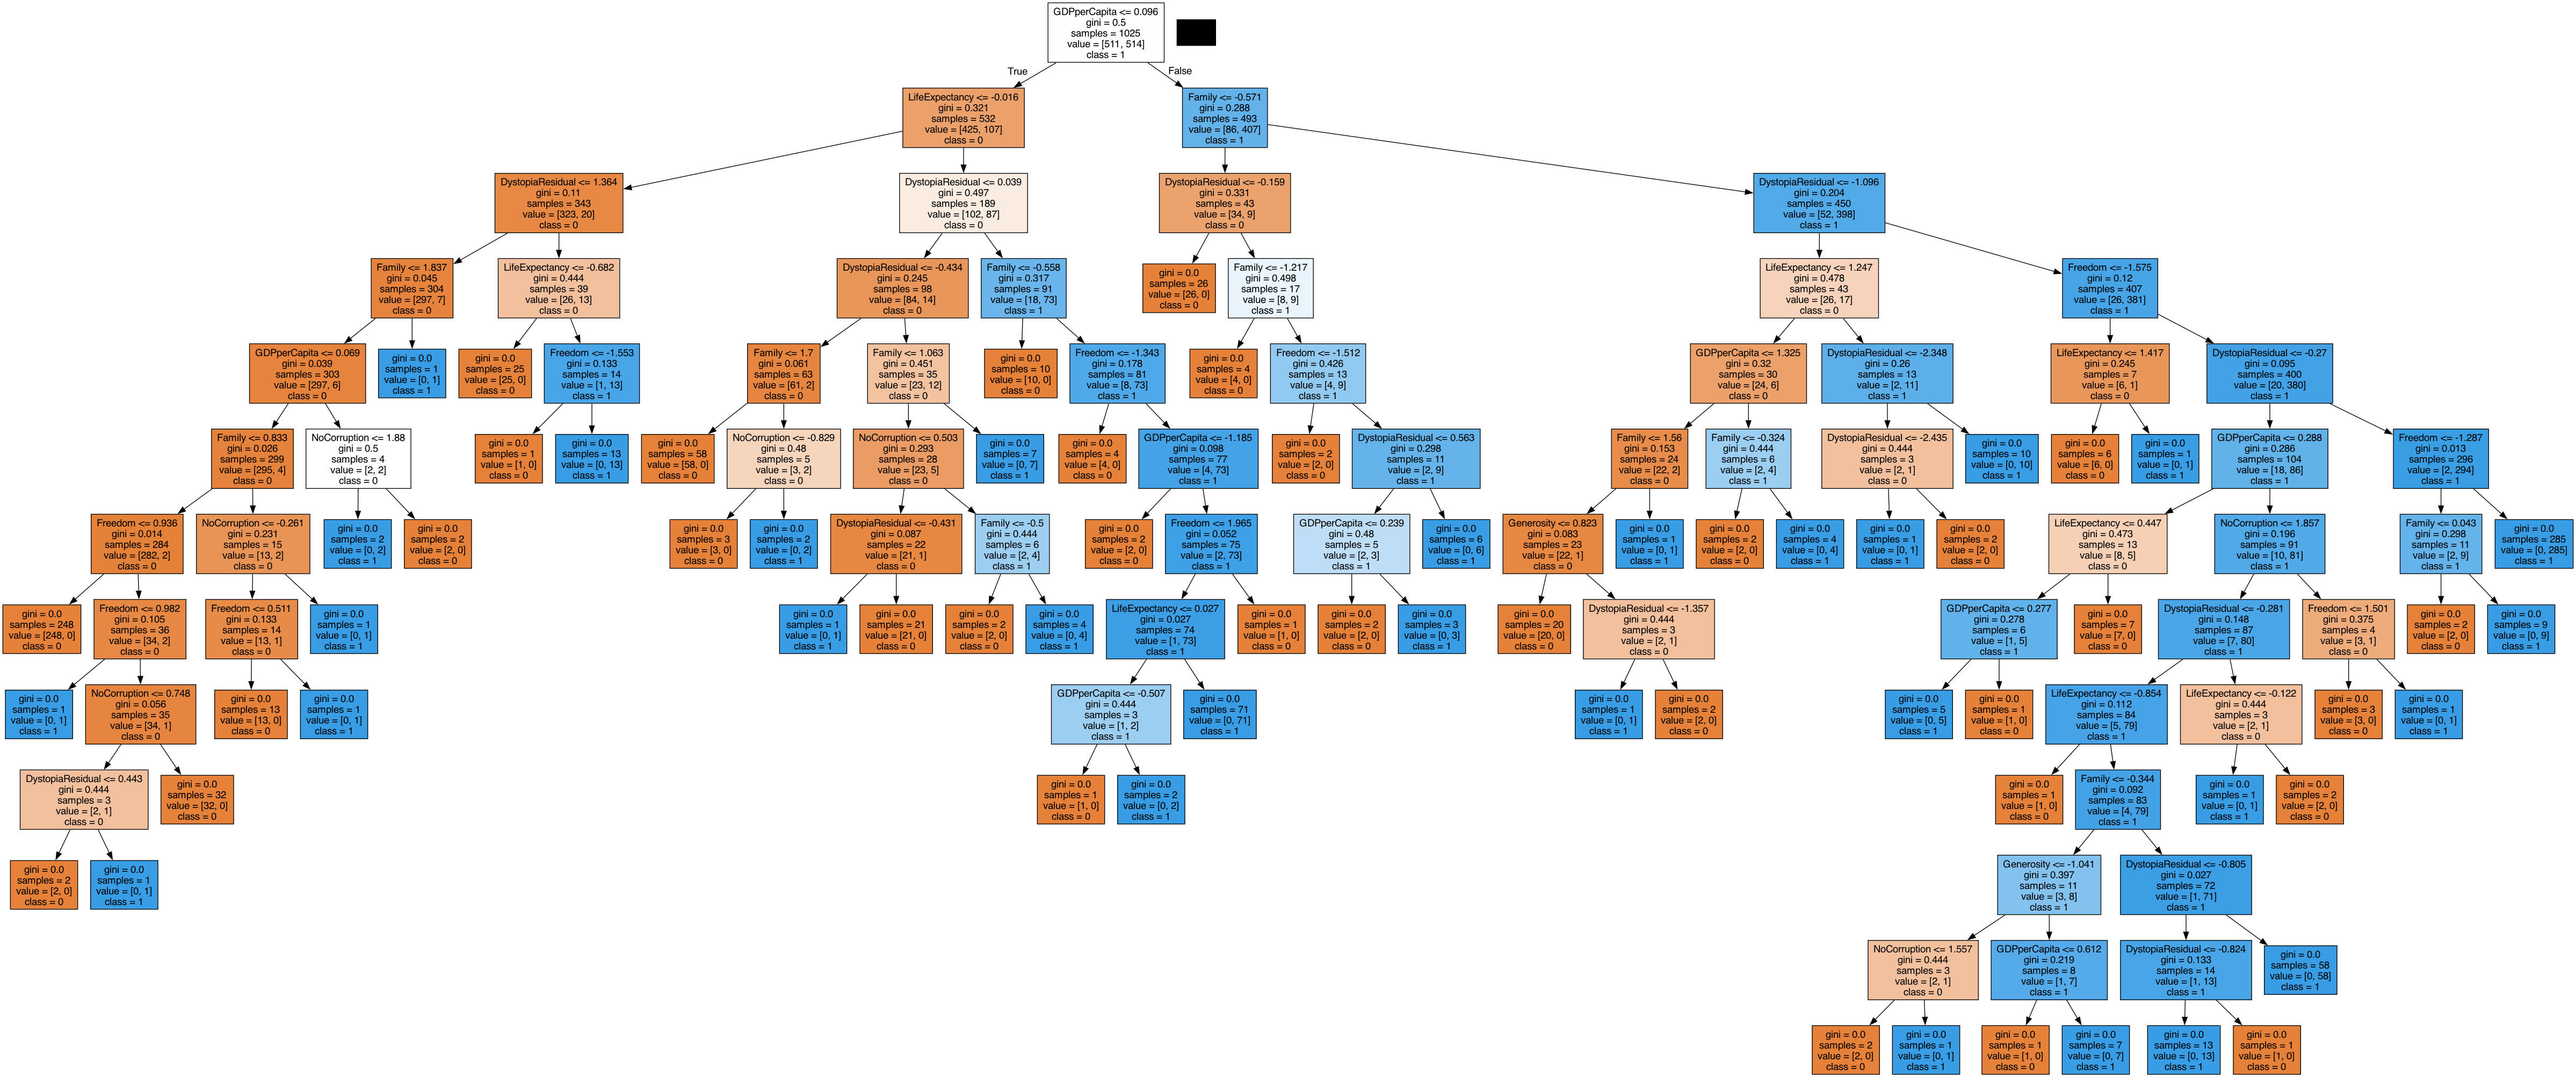

In [26]:
# Create DOT data
dot_data = tree.export_graphviz(
    decision_tree_model, out_file=None, feature_names=features.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


## Model Development Analysis

### Decision Tree Model

The exploration of the Decision Tree model for predicting levels of happiness provided valuable insights into its performance. Below is a summary of the key performance metrics observed:

#### Performance Metrics:

- **Accuracy Score**: The model recorded an accuracy of 90.05%, indicating a robust ability to make correct predictions across the dataset.

- **Precision**: Showed a precision of 89% for predicting "not happy" and 91% for "happy," reflecting its competence in returning relevant results.

- **Recall**: Demonstrated a recall of 91% for the "not happy" class and 89% for the "happy" class, showcasing the model's capacity to correctly identify nearly all relevant instances.

- **F1-Score**: The F1-scores for both classes were balanced at 90%, signifying a healthy equilibrium between precision and recall, indicative of strong model performance.

#### Confusion Matrix Insights:

- **True Positives (Happy)**: Effectively identified 150 individuals as happy, showcasing the model's sensitivity.
- **True Negatives (Not Happy)**: Correctly recognized 158 individuals as not happy, highlighting the model's accuracy.
- **False Positives**: Encountered 15 instances of incorrect predictions as happy, suggesting a slight area for improvement.
- **False Negatives**: Reported 19 instances where individuals were mistakenly classified as not happy.

### Interpretation

The Decision Tree model exhibits commendable performance in classifying individuals into happiness categories, with an overall accuracy of 90.05%. Its balanced precision, recall, and F1-scores indicate a capable and reliable model. However, compared to the Logistic Regression and Random Forest models, it shows a slightly higher rate of false positives and negatives, which points towards a margin of improvement in model refinement and feature selection.

### Recommendations

Given the intrinsic interpretability and the relatively high performance of the Decision Tree model, it serves as a valuable asset within the predictive model suite. To enhance its efficacy:

1. **Pruning and Optimization**: Employ pruning techniques to reduce the model's complexity, which may help in reducing overfitting and improving prediction accuracy.
   
2. **Feature Importance Re-evaluation**: Reassess the impact of different features on predictions to optimize the selection and improve the model's precision and recall.
   
3. **Advanced Hyperparameter Tuning**: Investigate the tuning of decision tree hyperparameters to find an optimal configuration that might reduce false positives and negatives.
   
4. **Ensemble Methods Exploration**: Consider leveraging ensemble methods such as Random Forest or Gradient Boosting, which use multiple decision trees to improve predictive performance and stability.

The Decision Tree model, with its intuitive understanding and solid performance metrics, stands as an instrumental approach in the project's objective to predict happiness effectively. Continuous refinement and strategic enhancements promise to elevate its predictive accuracy and reliability further.
